# Predict Podcast Listening Time

http://kaggle.com/competitions/playground-series-s5e4/overview

Predict listening time of a podcast episode

In [4]:
import pandas as pd
import numpy as np

### Load Data

In [5]:
test_data_path = "/content/test.csv"
train_data_path = "/content/train.csv"

df_test = pd.read_csv(test_data_path)
df_train = pd.read_csv(train_data_path)

In [6]:
print("Shape ___________________________\n")
print(f"Train: {df_train.shape}\n Test: {df_test.shape}\n")
print("\nColumns ___________________________\n")
print(f"{df_train.columns.values}")
print("\nDuplicate Rows ___________________________\n")
print(f"Train: {df_train.duplicated().sum()}\n Test: {df_test.duplicated().sum()}")

Shape ___________________________

Train: (750000, 12)
 Test: (250000, 11)


Columns ___________________________

['id' 'Podcast_Name' 'Episode_Title' 'Episode_Length_minutes' 'Genre'
 'Host_Popularity_percentage' 'Publication_Day' 'Publication_Time'
 'Guest_Popularity_percentage' 'Number_of_Ads' 'Episode_Sentiment'
 'Listening_Time_minutes']

Duplicate Rows ___________________________

Train: 0
 Test: 0


### Train data analysis

In [7]:
df_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


### Test data analysis

In [9]:
df_test.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


### Find columns containing null data

In [11]:
def missing_data_analysis(df, name):
  columns =df.columns
  total_null_columns = 0
  for col, val in enumerate(df.isnull().sum()):
    if val>0:
      total_null_columns += 1
      print(f"{columns[col]}= {val}")
  print(f"{name} data has {total_null_columns} columns contain null values")

In [12]:
print("Train________________")
missing_data_analysis(df_train, "Train")
print("\n\nTest________________")
missing_data_analysis(df_test, "Test")

Train________________
Episode_Length_minutes= 87093
Guest_Popularity_percentage= 146030
Number_of_Ads= 1
Train data has 3 columns contain null values


Test________________
Episode_Length_minutes= 28736
Guest_Popularity_percentage= 48832
Test data has 2 columns contain null values


In [13]:
df_train.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [14]:
df_test.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
count,250000.000000,2.212640e+05,250000.000000,201168.000000,250000.000000
mean,874999.500000,4.192987e+02,59.716491,52.192796,1.355852
std,72168.927986,1.668545e+05,22.880028,28.445034,4.274399
min,750000.000000,2.470000e+00,2.490000,0.000000,0.000000
25%,812499.750000,3.578000e+01,39.250000,28.320000,0.000000
50%,874999.500000,6.397000e+01,59.900000,53.360000,1.000000
75%,937499.250000,9.415000e+01,79.390000,76.560000,2.000000
max,999999.000000,7.848626e+07,117.760000,116.820000,2063.000000


### Imputation

In [15]:
from sklearn.impute import SimpleImputer

# Since it’s just 1 missing value and it's likely discrete/low-range numeric
ads_imputer = SimpleImputer(strategy="mean")
length_imputer = SimpleImputer(strategy="mean")
popularity_imputer = SimpleImputer(strategy="mean")

# fit transform training data
df_train['Number_of_Ads'] = ads_imputer.fit_transform(df_train[['Number_of_Ads']])
df_train['Episode_Length_minutes'] = length_imputer.fit_transform(df_train[['Episode_Length_minutes']])
df_train['Guest_Popularity_percentage'] = popularity_imputer.fit_transform(df_train[['Guest_Popularity_percentage']])

# transform training data
df_test['Episode_Length_minutes'] = length_imputer.transform(df_test[['Episode_Length_minutes']])
df_test['Guest_Popularity_percentage'] = popularity_imputer.transform(df_test[['Guest_Popularity_percentage']])

### Feature engineering

In [16]:
df_train_final = df_train.copy()
df_test_final = df_test.copy()

In [17]:
df_train_final.drop(columns=["id"], inplace=True)
df_test_final.drop(columns=["id"], inplace=True)

In [18]:
cat_cols =['Publication_Time','Publication_Day','Genre',"Episode_Sentiment"]

df_train_final= pd.get_dummies(df_train_final, columns=cat_cols)
df_test_final = pd.get_dummies(df_test_final, columns=cat_cols)

In [19]:
df_train_final = df_train_final.astype({col: 'int' for col in df_train_final.select_dtypes('bool').columns})
df_test_final = df_test_final.astype({col: 'int' for col in df_test_final.select_dtypes('bool').columns})

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_cols = ['Podcast_Name', 'Episode_Title']

tfidf_podcast = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_episode = TfidfVectorizer(max_features=200, stop_words='english')

# Fit on train, transform on both train and test
tfidf_podcast_train = tfidf_podcast.fit_transform(df_train_final['Podcast_Name'].fillna(''))
tfidf_podcast_test = tfidf_podcast.transform(df_test_final['Podcast_Name'].fillna(''))

tfidf_episode_train = tfidf_episode.fit_transform(df_train_final['Episode_Title'].fillna(''))
tfidf_episode_test = tfidf_episode.transform(df_test_final['Episode_Title'].fillna(''))

# Convert to DataFrame
podcast_train_df = pd.DataFrame(tfidf_podcast_train.toarray(), columns=[f'podcast_tfidf_{i}' for i in range(tfidf_podcast_train.shape[1])])
podcast_test_df = pd.DataFrame(tfidf_podcast_test.toarray(), columns=podcast_train_df.columns)

episode_train_df = pd.DataFrame(tfidf_episode_train.toarray(), columns=[f'episode_tfidf_{i}' for i in range(tfidf_episode_train.shape[1])])
episode_test_df = pd.DataFrame(tfidf_episode_test.toarray(), columns=episode_train_df.columns)

# Reset indices (important before concat)
df_train_final = df_train_final.reset_index(drop=True)
df_test_final = df_test_final.reset_index(drop=True)

# Concatenate with original data
df_train_final = pd.concat([df_train_final.drop(columns=text_cols), podcast_train_df, episode_train_df], axis=1)
df_test_final = pd.concat([df_test_final.drop(columns=text_cols), podcast_test_df, episode_test_df], axis=1)

In [21]:
df_train_final.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Publication_Day_Friday,...,episode_tfidf_82,episode_tfidf_83,episode_tfidf_84,episode_tfidf_85,episode_tfidf_86,episode_tfidf_87,episode_tfidf_88,episode_tfidf_89,episode_tfidf_90,episode_tfidf_91
0,64.504738,74.81,52.236449,0.0,31.41998,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.985677,0.0,0.168647
1,119.800000,66.95,75.950000,2.0,88.01241,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.176528
2,73.900000,69.97,8.970000,0.0,44.92531,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.169227
3,67.170000,57.22,78.700000,2.0,46.27824,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.172897
4,110.510000,80.07,58.680000,3.0,75.61031,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.179442


### Prepare Final Training & Test Sets

In [22]:
X = df_train_final.drop(columns=['Listening_Time_minutes'])
y = df_train_final['Listening_Time_minutes']
X_test = df_test_final

### Train-Validation Split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

### Train a Base XGBoost Regressor

In [45]:
from lightgbm import LGBMRegressor
from sklearn.metrics import root_mean_squared_error

model = LGBMRegressor(
    n_estimators=500,
    reg_alpha=5,
    max_depth=10,
    boosting_type="gbdt",
    learning_rate=0.05,
    random_state=42)

model.fit(X_train, y_train)

# Predict on validation
y_pred = model.predict(X_val)

# Evaluate
print("Validation RMSE:", root_mean_squared_error(y_val, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 206
[LightGBM] [Info] Start training from score 45.447808
Validation RMSE: 13.029466529781189


### Feature Importance (Plot)

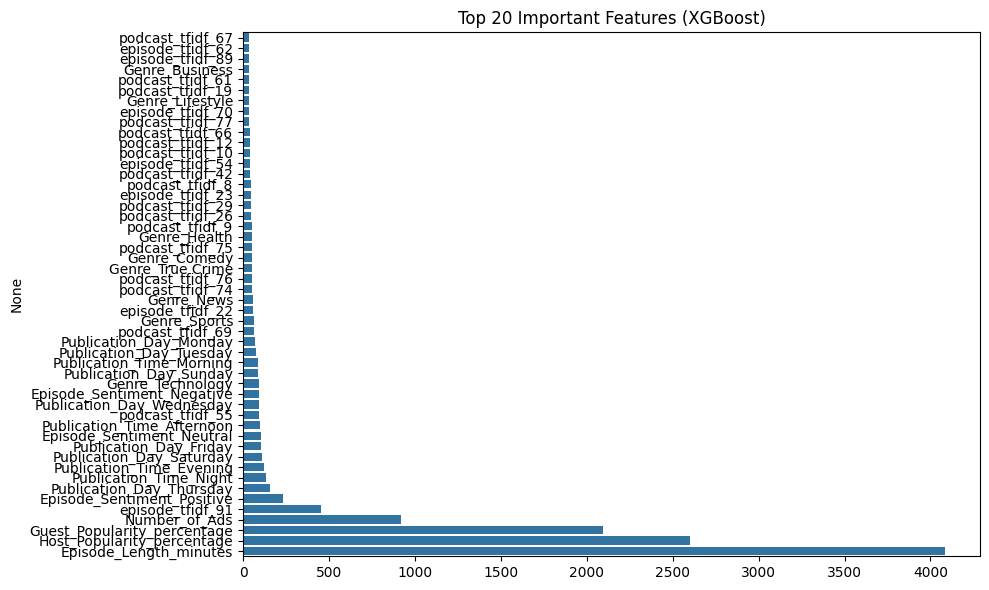

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 20 features
feature_importance = model.feature_importances_
top_idx = np.argsort(feature_importance)[-50:]
top_features = X.columns[top_idx]
top_importances = feature_importance[top_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title("Top 20 Important Features (XGBoost)")
plt.tight_layout()
plt.show()


### Final Predictions on Test Set

In [48]:
test_preds = model.predict(X_test)

submission = pd.DataFrame({
    'id': df_test['id'],
    'Predicted_Listening_Time': test_preds
})
submission.head()

,id,Predicted_Listening_Time
0,750000,56.189722
1,750001,18.209349
2,750002,49.161894
3,750003,79.598978
4,750004,48.757000


In [49]:
submission.to_csv('submission.csv', index=False)